In [464]:
!pip install seaborn

In [465]:
# The code was removed by DSX for sharing.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [466]:
tf = pd.read_csv(get_object_storage_file_with_credentials_6378fccf462542e6887ba38584110363('KaggleTitanicDataSet', 'test.csv'))
tf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [467]:
df = df.drop(['PassengerId'], axis=1)
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [468]:
print(df.Embarked.value_counts())
print(df.Embarked.unique().size)

S    644
C    168
Q     77
Name: Embarked, dtype: int64
4


In [469]:
tf.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [470]:
df.Embarked = df.Embarked.fillna('S')
age_mean = df.Age.mean()
df.Age = df.Age.fillna(age_mean)

age_mean = tf.Age.mean()
tf.Age = tf.Age.fillna(age_mean)

tf.Fare = tf.Fare.fillna(tf.Fare.mean())

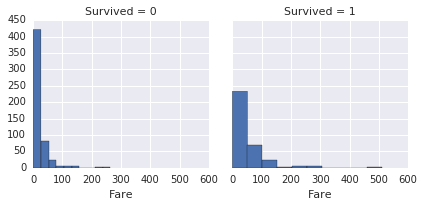

In [471]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Fare', bins=10)

In [472]:
fam_df = pd.DataFrame()
fam_df["isAlone"] = ~((df.SibSp + df.Parch)>0)
df["isAlone"] = fam_df
df["FamilySize"] = (df.SibSp + df.Parch +1)
FamCat_1 = df['FamilySize']==1
FamCat_4  = (df['FamilySize']<=4)
FamCat_5 =  df['FamilySize']>4
df['FamilySize'] = FamCat_1*1 + FamCat_4*2 + FamCat_5*3

df = df.drop(['SibSp','Parch'], axis=1)

fam_tf = pd.DataFrame()
fam_tf["isAlone"] = ~((tf.SibSp + tf.Parch)>0)
tf["isAlone"] = fam_tf
tf["FamilySize"] = (tf.SibSp + tf.Parch +1)
FamCat_1 = tf['FamilySize']==1
FamCat_4  = tf['FamilySize']<=4
FamCat_5 =  tf['FamilySize']>4
tf['FamilySize'] = FamCat_1*1 + FamCat_4*2 + FamCat_5*3
tf = tf.drop(['SibSp','Parch'], axis=1)

In [473]:
df['Age'] = pd.qcut(df['Fare'], 5, labels=[0, 1, 2, 3, 4])
df['Fare'] = pd.qcut(df['Fare'], 4, labels=[0, 1, 2, 3])

tf['Age'] = pd.qcut(tf['Fare'], 5, labels=[0, 1, 2, 3, 4])
tf['Fare'] = pd.qcut(tf['Fare'], 4, labels=[0, 1, 2, 3])

In [474]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [475]:
#df
emb = pd.get_dummies(df['Embarked'])
emb.Q =emb.Q*2
emb.S=emb.S*3
emb_combine= pd.DataFrame()
emb_combine['Embarked']  = emb.C+emb.Q+emb.S
df['Embarked'] =emb_combine

sex = pd.get_dummies(df['Sex'])
sex.female =sex.female*2
sex_combine= pd.DataFrame()
sex_combine['Sex']  = sex.female+sex.male
df['Sex'] =sex_combine

title = []
for i in df.Name:
    val = i[i.find(',')+2:i.find('.')]
    if (val=="Mr"):
        title.append(0)
    elif ((val=="Miss") | (val=="Mlle")):
        title.append(1)
    elif ((val=="Mme")|(val=="Ms")|(val=="Mrs")):
        title.append(2)
    elif ((val=='Lady') | (val=='the Countess') |(val=='Capt')| (val=='Col')|(val=='Don')|(val=='Dr')|(val=='Major')|(val=='Rev')|(val=='Sir')|(val=='Jonkheer')|(val=='Dona')|(val=='Master')):
        title.append(3)
    else:
        print("d",val)
title_series = pd.Series(title)
df['Title'] = title_series

#tf
emb = pd.get_dummies(tf['Embarked'])
emb.Q =emb.Q*2
emb.S=emb.S*3
emb_combine= pd.DataFrame()
emb_combine['Embarked']  = emb.C+emb.Q+emb.S
tf['Embarked'] =emb_combine

sex = pd.get_dummies(tf['Sex'])
sex.female =sex.female*2
sex_combine= pd.DataFrame()
sex_combine['Sex']  = sex.female+sex.male
tf['Sex'] =sex_combine

title = []
for i in tf.Name:
    val = i[i.find(',')+2:i.find('.')]
    if (val=="Mr"):
        title.append(0)
    elif ((val=="Miss") | (val=="Mlle")):
        title.append(1)
    elif ((val=="Mme")|(val=="Ms")|(val=="Mrs")):
        title.append(2)
    elif ((val=='Lady') | (val=='the Countess') |(val=='Capt')| (val=='Col')|(val=='Don')|(val=='Dr')|(val=='Major')|(val=='Rev')|(val=='Sir')|(val=='Jonkheer')|(val=='Dona')|(val=='Master')):
        title.append(3)
    else:
        print(val)
title_series = pd.Series(title)
tf['Title'] = title_series

In [476]:
clean_ticket = []
ticket_df = pd.Series(df.Ticket)

for i in ticket_df:
    temp_str = ""
    val = i.lower()
    val = val.replace(".", "")
    val = val.replace("/", "")
    for j in val:
        if (j.isalpha()):
            temp_str +=j
        else:
            break
    if (len(temp_str)>0):
        clean_ticket.append(temp_str)
    else:
        clean_ticket.append('XXX')
ticket_df = pd.Series(clean_ticket)

equiv = {'XXX':0, 'pc':1, 'ca':2,'a':3,'stono':4,'sotonoq':5,'scparis':6,'wc':7,'soc':8,
'c':9,'fcc':10,'line':11,'sopp':12,'wep':13,'pp':14,'scah':15,'sotono':16,'ppp':17,'swpp':18,
'fc':19,'scow':20,'fa':21,'casoton':22,'as':23,'sop':24,'sca':25,'sp':26,'sc':27,'lp':28,'aq':29,'stonoq':30}

df.Ticket = ticket_df.map(equiv)


clean_ticket = []
ticket_tf = pd.Series(tf.Ticket)

for i in ticket_tf:
    temp_str = ""
    val = i.lower()
    val = val.replace(".", "")
    val = val.replace("/", "")
    for j in val:
        if (j.isalpha()):
            temp_str +=j
        else:
            break
    if (len(temp_str)>0):
        clean_ticket.append(temp_str)
    else:
        clean_ticket.append('XXX')
ticket_tf = pd.Series(clean_ticket)

print (ticket_tf.value_counts())
tf.Ticket = ticket_tf.map(equiv)

XXX        296
pc          32
ca          27
a           11
sotonoq      9
scparis      8
wc           5
sopp         4
fcc          4
stono        3
c            3
sca          2
aq           2
scah         2
fc           2
soc          2
pp           1
sotono       1
lp           1
stonoq       1
wep          1
sc           1
dtype: int64


In [477]:
cabin_series = []
cabin_df = pd.Series(df.Cabin)
for i in cabin_df:
    if (str(i)!="nan"):
        cabin_series.append(i[0])
    else:
        cabin_series.append('XXX')
cabin_series = pd.Series(cabin_series)
cabin_series.value_counts()

equiv = {'XXX':0, 'C':1, 'B':2,'D':3,'E':4,'A':5,'F':6,'G':7,'T':8}

df.Cabin = cabin_series.map(equiv)


cabin_series = []
cabin_tf = pd.Series(tf.Cabin)
for i in cabin_tf:
    if (str(i)!="nan"):
        cabin_series.append(i[0])
    else:
        cabin_series.append('XXX')
cabin_series = pd.Series(cabin_series)
cabin_series.value_counts()

equiv = {'XXX':0, 'C':1, 'B':2,'D':3,'E':4,'A':5,'F':6,'G':7,'T':8}

tf.Cabin = cabin_series.map(equiv)

In [478]:
features = ['Pclass', 'Sex', 'Age', 'isAlone', 'Fare', 'Embarked', 'FamilySize', 'Title','Ticket']
X_train = df[features]
Y_train = df['Survived']
X_test = tf[features]

from sklearn.ensemble import RandomForestClassifier
  
cl = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0)

cl.fit(X_train, Y_train)
Y_pred = cl.predict(X_test)
acc_decision_tree = round(cl.score(X_train, Y_train) * 100, 2)
acc_decision_tree

87.43

In [479]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
#Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

coeff_df = pd.DataFrame()
coeff_df["Features"] = pd.Series(features)
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Features,Correlation
1,Sex,2.127273
3,isAlone,1.733699
7,Title,0.584855
2,Age,0.121924
4,Fare,0.077015
8,Ticket,-0.005117
5,Embarked,-0.221032
0,Pclass,-0.608682
6,FamilySize,-1.574918


In [480]:
from sklearn.svm import SVC, LinearSVC
logreg = SVC()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

coeff_df = pd.DataFrame()
coeff_df["Features"] = pd.Series(features)
#coeff_df["Correlation"] = pd.Series(logreg.)

#coeff_df.sort_values(by='Correlation', ascending=False)

In [481]:
submission = pd.DataFrame({
        "PassengerId": tf["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)

In [482]:
# The code was removed by DSX for sharing.

<Response [201]>


In [483]:
b = df.Fare.isnull()
for i in range(b.size):
    if (b[i]==True):
        print (i)

In [484]:
X_test.isnull().sum()

Pclass        0
Sex           0
Age           0
isAlone       0
Fare          0
Embarked      0
FamilySize    0
Title         0
Ticket        0
dtype: int64

In [485]:
title = []
for i in df.Name:
    title.append(i[i.find(',')+2:i.find('.')])
title_series = pd.Series(title)
title_series.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
Jonkheer          1
Don               1
Ms                1
Mme               1
Capt              1
the Countess      1
Sir               1
dtype: int64

In [486]:
a = X_test.Title.isnull()
for i in range(a.size):
    if (a[i]==True):
        print (i)

In [487]:
df.corr()["Survived"]

Survived      1.000000
Pclass       -0.338481
Sex           0.543351
Ticket       -0.044562
Cabin         0.007692
Embarked     -0.167675
isAlone      -0.203367
FamilySize   -0.279855
Title         0.441635
Name: Survived, dtype: float64

In [489]:
cabin_series.value_counts()

XXX    327
6       17
1       14
4       10
0        9
7        8
8        7
9        7
5        7
2        6
3        4
F        1
D        1
dtype: int64